### 1.基础方法：[ ]和.

这是两种最直观的方法，任何有面向对象编程经验的人应该都很容易理解。下面是一个代码示例：

In [1]:
import pandas as pd
import numpy as np

series1 = pd.Series([1, 2, 3, 4, 5, 6, 7],
    index=["C", "D", "E", "F", "G", "A", "B"])

print("series1['E'] = {} \n".format(series1['E']));
print("series1.E = {} \n".format(series1.E));


series1['E'] = 3 

series1.E = 3 



注1：对于类似属性的访问方式.来说，要求索引元素必须是有效的Python标识符的时候才可以，而对于series1.1这样的索引是不行的。

注2：[]和.提供了简单和快速访问pands数据结构的方法。这种方法非常的直观。然而，由于要访问的数据类型并不是事先知道的，因此使用这两种方法方式存在一些优化限制。因此对于产品级的代码来说，pandas官方建议使用pandas库中提供的数据访问方法。

### 2.loc与iloc

loc：通过行和列的索引来访问数据
iloc：通过行和列的下标来访问数据
注意：索引的类型可能是整数。

实际上，当DataFrame通过这两个操作符访问数据，可以只指定一个索引来访问一行的数据，例如：

In [3]:
df1 = pd.DataFrame({"note" : ["C", "D", "E", "F", "G", "A", "B"],
    "weekday": ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]},
    index=['1', '2', '3', '4', '5', '6', '7'])

# 这里通过索引'2'可以方法到第2行的所有数据
print("df1.loc['2']:\n{}\n".format(df1.loc['2']))

# 除此之外，通过这两个操作符我们还可以访问某个范围之内的数据，例如这样：
print("series1.loc['E':'A']=\n{}\n".format(series1.loc['E':'A']));
print("df1.iloc[2:4]=\n{}\n".format(df1.iloc[2:4]))
 

df1.loc['2']:
note         D
weekday    Tue
Name: 2, dtype: object

series1.loc['E':'A']=
E    3
F    4
G    5
A    6
dtype: int64

df1.iloc[2:4]=
  note weekday
3    E     Wed
4    F     Thu



### 3.at与iat
这两个操作符用来访问单个的元素值（Scalar Value）。类似的：

at：通过行和列的索引来访问数据
iat：通过行和列的下标来访问数据

In [4]:
print("series1.at['E']={}\n".format(series1.at['E']));
print("df1.iloc[4,1]={}\n".format(df1.iloc[4,1]))

series1.at['E']=3

df1.iloc[4,1]=Fri



### 4.Index对象

Index提供了查找，数据对齐和重新索引所需的基础数据结构。 最直接的，我们可以通过一个数组来创建Index对象。在创建的同时我们还可以通过name指定索引的名称：

In [6]:
index = pd.Index(['C','D','E','F','G','A','B'], name='note')

Index类提供了很多的方法进行各种操作，这个建议读者直接查询API说明即可，这里不多做说明。稍微提一下的是，Index对象可以互相之间做集合操作:

In [5]:
a = pd.Index([1,2,3,4,5])
b = pd.Index([3,4,5,6,7])
 
print("a|b = {}\n".format(a|b))
print("a&b = {}\n".format(a&b))
print("a.difference(b) = {}\n".format(a.difference(b)))

a|b = Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64')

a&b = Int64Index([3, 4, 5], dtype='int64')

a.difference(b) = Int64Index([1, 2], dtype='int64')



Index类有很多的子类，下面是最常见的一些：

 - [RangeIndex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.RangeIndex.html#pandas.RangeIndex)
 - [CategoricalIndex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.CategoricalIndex.html#pandas.CategoricalIndex)
 - [MultiIndex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.MultiIndex.html#pandas.MultiIndex)
 - [IntervalIndex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.IntervalIndex.html#pandas.IntervalIndex)
 - [DatetimeIndex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html#pandas.DatetimeIndex)
 - …

### 5.MultiIndex
MultiIndex，或者称之为Hierarchical Index是指数据的行或者列通过多层次的标签来进行索引。 例如，我们要通过一个MultiIndex描述三个公司在三年内每个季度的营业额，可以这样：

In [8]:
import pandas as pd
import numpy as np

multiIndex = pd.MultiIndex.from_arrays([
    ['Geagle', 'Geagle', 'Geagle', 'Geagle',
     'Epple', 'Epple', 'Epple', 'Epple', 'Macrosoft',
     'Macrosoft', 'Macrosoft', 'Macrosoft', ],
    ['S1', 'S2', 'S3', 'S4', 'S1', 'S2', 'S3', 'S4', 'S1', 'S2', 'S3', 'S4']],
    names=('Company', 'Turnover'))

print(multiIndex)

MultiIndex(levels=[['Epple', 'Geagle', 'Macrosoft'], ['S1', 'S2', 'S3', 'S4']],
           labels=[[1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['Company', 'Turnover'])


从这个输出可以看出，MultiIndex中的levels数组数量对应了索引的级别数量，labels对应了levels中元素的下标。 下面我们用一个随机数来构造一个DataFrame：

In [30]:
df = pd.DataFrame(data=np.random.randint(0, 1000, 36).reshape(-1, 12),
                  index=[2016, 2017, 2018],
                  columns=multiIndex)
print("df = \n{}\n".format(df))

df = 
Company  Geagle                Epple                Macrosoft               
Turnover     S1   S2   S3   S4    S1   S2   S3   S4        S1   S2   S3   S4
2016        920  490  410  144    99  411  109  737       346  155  466  957
2017        636  431  666  633   652  594  910  531       318  883  802  645
2018        258  947  913  507   683  584  178  365       737  620  587  317



这个输出很直观的可以看出三个公司在三年内每个季度的营业额。 有了多级索引，我们可以方便的进行数据的筛选，例如：

通过df.loc[2017, (['Geagle', 'Epple', 'Macrosoft'] ,'S1')])筛选出三个公司2017年第一季度的营业额

通过df.loc[2018, 'Geagle']筛选出Geagle公司2018年每个季度的营业额

In [35]:
# df = df.sort_index(axis=1)
# or
# df.sort_index(level=['year','foo'], ascending=[1, 0], inplace=True)

print (df.columns.is_lexsorted())

print(df.loc[2017, (['Geagle', 'Epple', 'Macrosoft'],'S1')])

print(df.loc[2018, 'Geagle'])

True
Company    Turnover
Epple      S1          652
Geagle     S1          636
Macrosoft  S1          318
Name: 2017, dtype: int32
Turnover
S1    258
S2    947
S3    913
S4    507
Name: 2018, dtype: int32


### 6.数据整合
Concat(enate)：串联，连接，级连

Append：附加，增补

Merge：融合，归并，合并

Join：合并，接合，交接

#### Concat与Append
concat函数的作用是将多个数据串联到一起。例如，某个多条数据分散在3个地方记录，最后我们将三个数据添加到一起。下面是一个代码示例：

In [37]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({'Note': ['C', 'D'],
                    'Weekday': ['Mon', 'Tue']},
                    index=[1, 2])

df2 = pd.DataFrame({'Note': ['E', 'F'],
                    'Weekday': ['Wed', 'Thu']},
                    index=[3, 4])

df3 = pd.DataFrame({'Note': ['G', 'A', 'B'],
                    'Weekday': ['Fri', 'Sat', 'Sun']},
                    index=[5, 6, 7])

df_concat = pd.concat([df1, df2, df3], keys=['df1', 'df2', 'df3'])
print("df_concat=\n{}\n".format(df_concat))

# 如果需要，我们可以指定axis=1（列）为主进行串联：
df_concat_column = pd.concat([df1, df2, df3], axis=1)
print("df_concat_column=\n{}\n".format(df_concat_column))

df_concat=
      Note Weekday
df1 1    C     Mon
    2    D     Tue
df2 3    E     Wed
    4    F     Thu
df3 5    G     Fri
    6    A     Sat
    7    B     Sun

df_concat_column=
  Note Weekday Note Weekday Note Weekday
1    C     Mon  NaN     NaN  NaN     NaN
2    D     Tue  NaN     NaN  NaN     NaN
3  NaN     NaN    E     Wed  NaN     NaN
4  NaN     NaN    F     Thu  NaN     NaN
5  NaN     NaN  NaN     NaN    G     Fri
6  NaN     NaN  NaN     NaN    A     Sat
7  NaN     NaN  NaN     NaN    B     Sun



concat是将多个数据串联在一起。类似的，对于某个具体的数据来说，我们可以在其数据基础上添加（append）其他数据来进行串联.

In [38]:
df_append = df1.append([df2, df3])
print("df_append=\n{}\n".format(df_append))

df_append=
  Note Weekday
1    C     Mon
2    D     Tue
3    E     Wed
4    F     Thu
5    G     Fri
6    A     Sat
7    B     Sun



#### Merge与Join
pandas中的Merge操作和SQL语句中的Join操作是类似的。Join操作可以分为下面几种：

 - INNER
 - LEFT OUTER
 - RIGHT OUTER
 - FULL OUTER
 - CROSS
 
关于这几种的Join操作的含义请参阅其他资料，例如维基百科：[Join (SQL)](https://en.wikipedia.org/wiki/Join_(SQL))。 使用pandas进行Merge操作很简单，下面是一段代码示例：

In [44]:
import pandas as pd
import numpy as np
 
df1 = pd.DataFrame({'key': ['K1', 'K2', 'K3', 'K4'],
                    'A': ['A1', 'A2', 'A3', 'A8'],
                    'B': ['B1', 'B2', 'B3', 'B8']})
 
df2 = pd.DataFrame({'key': ['K3', 'K4', 'K5', 'K6'],
                    'A': ['A3', 'A4', 'A5', 'A6'],
                    'B': ['B3', 'B4', 'B5', 'B6']})
 
print("df1=\n{}\n".format(df1))
print("df2=\n{}\n".format(df2))
 
merge_df = pd.merge(df1, df2)
merge_inner = pd.merge(df1, df2, how='inner', on=['key'])
merge_left = pd.merge(df1, df2, how='left')
merge_left_on_key = pd.merge(df1, df2, how='left', on=['key'])
merge_right_on_key = pd.merge(df1, df2, how='right', on=['key'])
merge_outer = pd.merge(df1, df2, how='outer', on=['key'])
 
print("merge_df=\n{}\n".format(merge_df))
print("merge_inner=\n{}\n".format(merge_inner))
print("merge_left=\n{}\n".format(merge_left))
print("merge_left_on_key=\n{}\n".format(merge_left_on_key))
print("merge_right_on_key=\n{}\n".format(merge_right_on_key))
print("merge_outer=\n{}\n".format(merge_outer))

df1=
    A   B key
0  A1  B1  K1
1  A2  B2  K2
2  A3  B3  K3
3  A8  B8  K4

df2=
    A   B key
0  A3  B3  K3
1  A4  B4  K4
2  A5  B5  K5
3  A6  B6  K6

merge_df=
    A   B key
0  A3  B3  K3

merge_inner=
  A_x B_x key A_y B_y
0  A3  B3  K3  A3  B3
1  A8  B8  K4  A4  B4

merge_left=
    A   B key
0  A1  B1  K1
1  A2  B2  K2
2  A3  B3  K3
3  A8  B8  K4

merge_left_on_key=
  A_x B_x key  A_y  B_y
0  A1  B1  K1  NaN  NaN
1  A2  B2  K2  NaN  NaN
2  A3  B3  K3   A3   B3
3  A8  B8  K4   A4   B4

merge_right_on_key=
   A_x  B_x key A_y B_y
0   A3   B3  K3  A3  B3
1   A8   B8  K4  A4  B4
2  NaN  NaN  K5  A5  B5
3  NaN  NaN  K6  A6  B6

merge_outer=
   A_x  B_x key  A_y  B_y
0   A1   B1  K1  NaN  NaN
1   A2   B2  K2  NaN  NaN
2   A3   B3  K3   A3   B3
3   A8   B8  K4   A4   B4
4  NaN  NaN  K5   A5   B5
5  NaN  NaN  K6   A6   B6



这段代码说明如下：

merge函数的join参数的默认值是“inner”，因此merge_df是两个数据的inner join的结果。另外，在不指明的情况下，merge函数使用所有同名的列名作为key来进行运算。

 - merge_inner是指定了列的名称进行inner join。
 - merge_left是left outer join的结果
 - merge_left_on_key是指定了列名进行left outer join的结果
 - merge_right_on_key是指定了列名进行right outer join的结果
 - merge_outer是full outer join的结果

DataFrame也提供了join函数来根据索引进行数据合并。它可以被用于合并多个DataFrame，这些DataFrame有相同的或者类似的索引，但是没有重复的列名。默认情况下，join函数执行left join。另外，假设两个数据有相同的列名，我们可以通过lsuffix和rsuffix来指定结果中列名的前缀。下面是一段代码示例：

In [45]:
df3 = pd.DataFrame({'key': ['K1', 'K2', 'K3', 'K4'],
                    'A': ['A1', 'A2', 'A3', 'A8'],
                    'B': ['B1', 'B2', 'B3', 'B8']},
                    index=[0, 1, 2, 3])
 
df4 = pd.DataFrame({'key': ['K3', 'K4', 'K5', 'K6'],
                    'C': ['A3', 'A4', 'A5', 'A6'],
                    'D': ['B3', 'B4', 'B5', 'B6']},
                    index=[1, 2, 3, 4])
 
print("df3=\n{}\n".format(df3))
print("df4=\n{}\n".format(df4))
 
join_df = df3.join(df4, lsuffix='_self', rsuffix='_other')
join_left = df3.join(df4, how='left', lsuffix='_self', rsuffix='_other')
join_right = df1.join(df4, how='outer', lsuffix='_self', rsuffix='_other')
 
print("join_df=\n{}\n".format(join_df))
print("join_left=\n{}\n".format(join_left))
print("join_right=\n{}\n".format(join_right))

df3=
    A   B key
0  A1  B1  K1
1  A2  B2  K2
2  A3  B3  K3
3  A8  B8  K4

df4=
    C   D key
1  A3  B3  K3
2  A4  B4  K4
3  A5  B5  K5
4  A6  B6  K6

join_df=
    A   B key_self    C    D key_other
0  A1  B1       K1  NaN  NaN       NaN
1  A2  B2       K2   A3   B3        K3
2  A3  B3       K3   A4   B4        K4
3  A8  B8       K4   A5   B5        K5

join_left=
    A   B key_self    C    D key_other
0  A1  B1       K1  NaN  NaN       NaN
1  A2  B2       K2   A3   B3        K3
2  A3  B3       K3   A4   B4        K4
3  A8  B8       K4   A5   B5        K5

join_right=
     A    B key_self    C    D key_other
0   A1   B1       K1  NaN  NaN       NaN
1   A2   B2       K2   A3   B3        K3
2   A3   B3       K3   A4   B4        K4
3   A8   B8       K4   A5   B5        K5
4  NaN  NaN      NaN   A6   B6        K6



### 7.数据集合和分组操作
很多时候，我们会需要对批量的数据进行分组统计或者再处理，groupby，agg，apply就是用来做这件事的。

 - groupby将数据分组，分组后得到pandas.core.groupby.DataFrameGroupBy类型的数据。
 - agg用来进行合计操作，agg是aggregate的别名。
 - apply用来将函数func分组化并将结果组合在一起。
 
这些概念都很抽象，我们还是通过代码来进行说明。

In [46]:
import pandas as pd
import numpy as np
 
df = pd.DataFrame({
    'Name': ['A','A','A','B','B','B','C','C','C'],
    'Data': np.random.randint(0, 100, 9)})
print('df=\n{}\n'.format(df))
 
groupby = df.groupby('Name')
 
print("Print GroupBy:")
for name, group in groupby:
    print("Name: {}\nGroup:\n{}\n".format(name, group))

df=
   Data Name
0    85    A
1    16    A
2    23    A
3    32    B
4    70    B
5    63    B
6    72    C
7    25    C
8    43    C

Print GroupBy:
Name: A
Group:
   Data Name
0    85    A
1    16    A
2    23    A

Name: B
Group:
   Data Name
3    32    B
4    70    B
5    63    B

Name: C
Group:
   Data Name
6    72    C
7    25    C
8    43    C



在这段代码中，我们生成了9个 \[(0, 100)之间的随机数，数据的第一列是['A','A','A','B','B','B','C','C','C']。然后我们以Name列进行groupby，得到的结果会根据将Name列值一样的分组在一起，我们将得到的结果进行了打印。

groupby并不是我们的最终目的，我们的目的是希望分组后还要对这些数据进行进一步的统计或者处理。pandas库本身就提供了很多进行操作的函数，例如：count，sum，mean，median，std，var，min，max，prod，first，last。这些函数的名称很容易明白它的作用。 例如：groupby.sum()就是对结果进行求和运行。 除了直接调用这些函数之外，我们也可以通过agg函数来达到这个目的，这个函数接收其他函数的名称，例如这样：groupby.agg(['sum'])。 通过agg函数，可以一次性调用多个函数，并且可以为结果列指定名称。 

In [49]:
print(groupby.sum())
print(groupby.agg(['sum']))
print(groupby.agg([('Total', 'sum'), ('Min', 'min')]))

      Data
Name      
A      124
B      165
C      140
     Data
      sum
Name     
A     124
B     165
C     140
      Data    
     Total Min
Name          
A      124  16
B      165  32
C      140  25


除了对数据集合进行统计，我们也可以通过apply函数进行分组数据的处理。像这样：

In [50]:
def sort(df):
    return df.sort_values(by='Data', ascending=False)
 
print("Sort Group: \n{}\n".format(groupby.apply(sort)))

Sort Group: 
        Data
Name        
A    0    85
     2    23
     1    16
B    4    70
     5    63
     3    32
C    6    72
     8    43
     7    25



### 8.时间相关
时间是应用程序中很频繁需要处理的逻辑，尤其是对于金融，科技，商业等领域。 当我们在讨论时间，我们讨论的可能是下面三种情况中的一种：

某个具体的时间点（Timestamp），例如：今天下午一点整
某个时间范围（Period），例如：整个这个月
某个时间间隔（Interval），例如：每周二上午七点整
Python语言提供了时间日期相关的基本API，它们位于datetime, time, calendar几个模块中。下面是一个代码示例：

In [51]:
import datetime as dt
import numpy as np
import pandas as pd
 
now = dt.datetime.now();
print("Now is {}".format(now))
 
yesterday = now - dt.timedelta(1);
print("Yesterday is {}\n".format(yesterday.strftime('%Y-%m-%d')))

Now is 2019-01-17 16:49:41.502170
Yesterday is 2019-01-16



在这段代码中，我们打印了今天的日期，并通过timedelta进行了日期的减法运算。这段代码输出如下： 借助pandas提供的接口，我们可以很方便的获得以某个时间间隔的时间序列，例如这样：

In [52]:
this_year = pd.date_range(dt.datetime(2018, 1, 1),
        dt.datetime(2018, 12, 31), freq='5D')
print("Selected days in 2018: \n{}\n".format(this_year))

Selected days in 2018: 
DatetimeIndex(['2018-01-01', '2018-01-06', '2018-01-11', '2018-01-16',
               '2018-01-21', '2018-01-26', '2018-01-31', '2018-02-05',
               '2018-02-10', '2018-02-15', '2018-02-20', '2018-02-25',
               '2018-03-02', '2018-03-07', '2018-03-12', '2018-03-17',
               '2018-03-22', '2018-03-27', '2018-04-01', '2018-04-06',
               '2018-04-11', '2018-04-16', '2018-04-21', '2018-04-26',
               '2018-05-01', '2018-05-06', '2018-05-11', '2018-05-16',
               '2018-05-21', '2018-05-26', '2018-05-31', '2018-06-05',
               '2018-06-10', '2018-06-15', '2018-06-20', '2018-06-25',
               '2018-06-30', '2018-07-05', '2018-07-10', '2018-07-15',
               '2018-07-20', '2018-07-25', '2018-07-30', '2018-08-04',
               '2018-08-09', '2018-08-14', '2018-08-19', '2018-08-24',
               '2018-08-29', '2018-09-03', '2018-09-08', '2018-09-13',
               '2018-09-18', '2018-09-23', '2018-09-2

这段代码获取了整个2018年中从元旦开始，每隔5天的日期序列。 date_range函数的详细说明见这里：[pandas.date_range](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html)

我们得到的返回值是DatetimeIndex类型的，我们可以创建一个DataFrame并以此作为索引：

In [53]:
df = pd.DataFrame(np.random.randint(0, 100, this_year.size), index=this_year)
print("Jan: \n{}\n".format(df['2018-01']))

Jan: 
             0
2018-01-01  59
2018-01-06  69
2018-01-11  58
2018-01-16   4
2018-01-21   0
2018-01-26  36
2018-01-31  69



在这段代码中，我们创建了与索引数量一样多的[0, 100)间的随机整数，并用this_year作为索引。用DatetimeIndex作索引的好处是，我们可以直接指定某个范围来选择数据，例如，通过df['2018-01']选出所有1月份的数据。

### 9.图形展示
pandas的图形展示依赖于matplotlib库。对于这个库，这里仅仅提供一个简单的代码示例，让大家感受一下图形展示的样子。 代码示例如下：

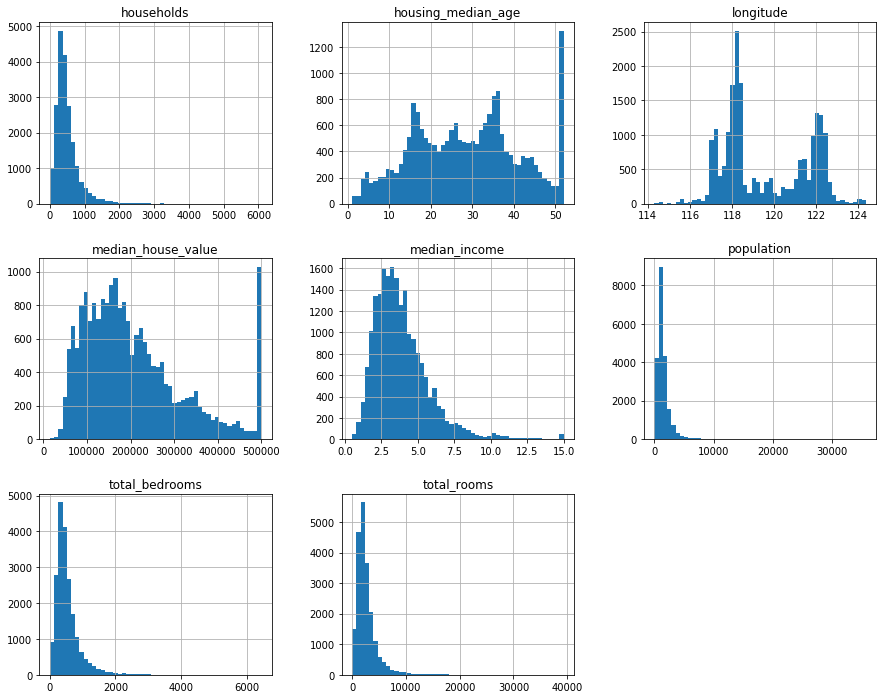

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('C:\\Users\Xuewan\Desktop\housing.csv')
data.hist(bins=50, figsize=(15, 12))
plt.show()

参考资料：

http://python.jobbole.com/89081/?utm_source=blog.jobbole.com&utm_medium=relatedPosts

https://www.cnblogs.com/zzhzhao/p/5269217.html